
# Principal component analyses (PCA) 
## A unsupervised machine learning algorithm for clustering



Principal component analysis:
- reduce dimensionality in a large data set
- transformation to a lower dimension without loosing the most important information
- a principle component is orthogonal (perpendicular) to every other principle component




Let us consider a problem with $n$ observations with measurements on a
set of $d$ features, $x_1, x_2,...,x_d$. If $d$ is a high number, exploratory data analysis becomes challenging, as for example our ability to visualize data is limited to 2 or 3 dimensions. We may explore the data set by examining two-dimensional scatter plots, each of which contains $n$ observations and two of the $d$ features. However, there are ${d \choose 2} = d(d-1)/2$ such scatter plots. If a data set has $d=15$ features there are ${15 \choose 2} = 105$  plots to draw! Moreover, it is very likely that none of them will be informative since they each contain just a small fraction of the total information present in the data set. Hence, we are looking for a low-dimensional $(k \ll d)$ representation of the data that captures as much of the information as possible. 


Beyond exploratory data analysis dimensionality reduction becomes important if the features of a given data set are redundant, or in other words are highly correlated ([multicollinearity ](https://en.wikipedia.org/wiki/Multicollinearity)).  Multicollinearity is a problem because it causes instability in regression models. The redundant information inflates the variance of the parameter estimates which can cause them to be statistically insignificant when they would have been significant otherwise (Kerns 2010). Hence, we are looking for a low-dimensional representation of the data, where the features are uncorrelated with one another. 

One technique that provides such a dimensionality reduction is [**Principal Component Analysis (PCA)**](https://en.wikipedia.org/wiki/Principal_component_analysis), which projects a high-dimensional feature space onto a new feature space. The original explanatory variables are replaced with new variables, derived from the original ones, that are by design uncorrelated with one another, thus eliminating the redundancy. 

The main idea behind PCA is that not all of the $d$ dimensions of the original data set are equally informative, where the concept of being informative is measured by the variability along each particular feature space dimension, also denoted as [variance](https://en.wikipedia.org/wiki/Variance). More precisely, **PCA finds the directions of maximum variance in high-dimensional data and projects it onto a smaller dimensional subspace while retaining most of the information**. Each of the dimensions found by PCA is effectively a linear combination of the $d$ features.



**Principal component analysis (PCA)** allows us to summarize a set of features with a smaller number of representative features that collectively explain most of the variability in the original data set. PCA projects the observations described by $d$ features into orthogonal, and thus by definition uncorrelated, variables. The new set of synthetic variables is equal in number to the original set. However, the first synthetic variable represents as much of the common variation of the original variables as possible, the second variable represents as much of the residual variation as possible, and so forth.

PCA is particularly powerful in dealing with multicollinearity and variables that outnumber the samples $(d > n )$, and it is widely used for explanatory data analysis, outlier detection and as a data pre-processing technique for predictive modelling. The figure below outlines the analysis workflow. 



### Data preparation and simple scaling



PCA starts with data. In this section we analyse the *food texture* data set. This open source data set is available [here](http://openmv.net/info/food-texture) and describes *texture measurements of a pastry-type food*. 


In [4]:
import pandas as pd

food = pd.io.parsers.read_csv('http://userpage.fu-berlin.de/soga/300/30100_data_sets/food-texture.csv', sep=',',index_col=0)

food.head(10)
#food.info()

,Oil,Density,Crispy,Fracture,Hardness
B110,16.5,2955,10,23,97
B136,17.7,2660,14,9,139
B171,16.2,2870,12,17,143
B192,16.7,2920,10,31,95
B225,16.3,2975,11,26,143
B237,19.1,2790,13,16,189
B261,18.4,2750,13,17,114
B264,17.5,2770,10,26,63
B353,15.7,2955,11,23,123
B360,16.4,2945,11,24,132


The data set consists of 50 rows (observations) and 6 columns (features/variables). The features are:

* Oil: percentage oil in the pastry
* Density: the product's density (the higher the number, the more dense the product)
* Crispy: a crispiness measurement, on a scale from 7 to 15, with 15 being more crispy.
* Fracture: the angle, in degrees, through which the pasty can be slowly bent before it fractures.
* Hardness: a sharp point is used to measure the amount of force required before breakage occurs.

For the sake of comprehensibility we start working with a reduced, two-dimensional toy data set, by extracting the columns `Oil` and `Density`. In a subsequent section we return to the full data set for our analyses.

We start with an exploratory data analysis and examine a scatter plot.

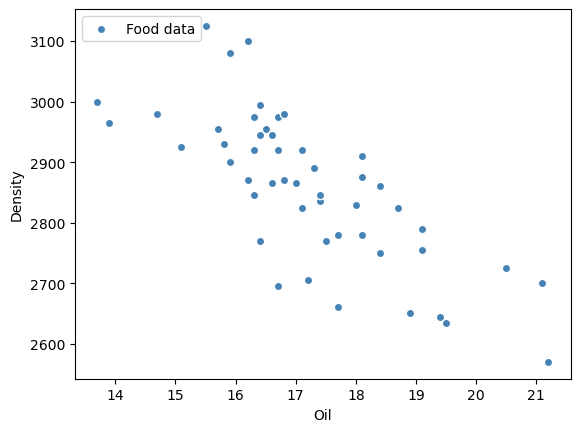

In [2]:
import matplotlib.pyplot as plt

plt.scatter(food['Oil'].values,food['Density'], c='steelblue', edgecolor = 'white',label = 'Food data')
plt.legend(loc = 'upper left')
plt.xlabel('Oil')
plt.ylabel('Density')
plt.show()

The scatter plot above indicates a relationship between the feature `Oil` and the feature `Density`. Note that the variables are not on the same scale. In general, the results of PCA depend on the scale of the variables. Therefore, each variable is typically centered and scaled to have a mean of zero and standard deviation of one. In certain settings, however, the variables are measured in the same units, and one may skip the standardization. 

For the sake of comprehensibility we write **two simple functions in Python** and visualize the effects of each **pre-processing step**. The goal is **to center each column to zero mean** and then scale it to have unit variance. 

In [7]:
import numpy as np


# Funktion definieren:
def center(v):
    return v-np.mean(v)


In [11]:
# Funktion mit array testen:
print('mean:',np.mean([1,2,3]),', center:', center([1,2,3])) 

mean: 2.0 , center: [-1.  0.  1.]


**Center the data**

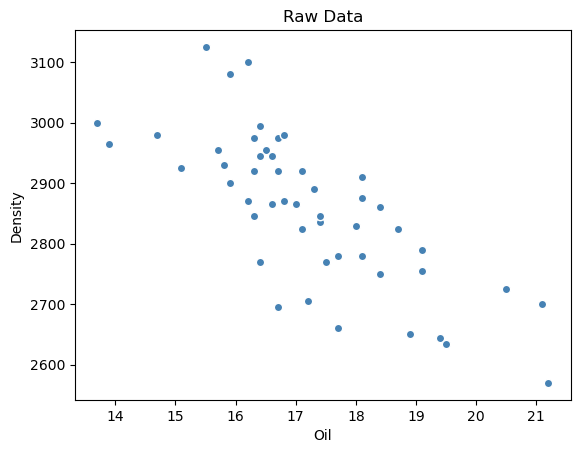

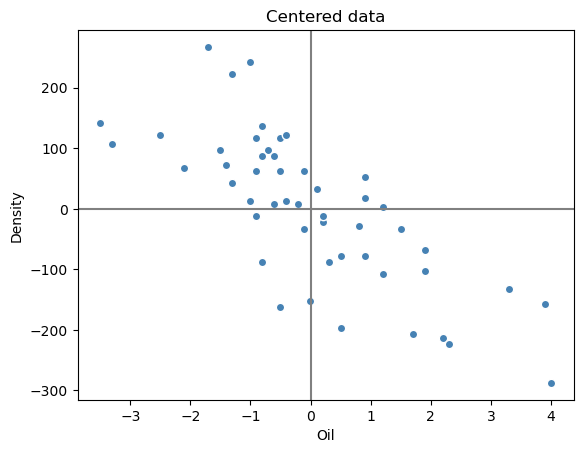

In [12]:
oil_centered = center(food['Oil'])
density_centered = center(food['Density'])

## plot 1: not centered data
plt.figure()
plt.scatter(food['Oil'].values,food['Density'], c='steelblue', edgecolor = 'white')
plt.xlabel('Oil')
plt.ylabel('Density')
plt.title('Raw Data')
plt.show()


## plot 2: centered data 
plt.figure()
plt.scatter(oil_centered,density_centered, c='steelblue', edgecolor = 'white')
plt.axvline(x=0, color = 'grey')
plt.axhline(y=0, color = 'grey')
plt.xlabel('Oil')
plt.ylabel('Density')
plt.title('Centered data')
plt.show()

### Scale the data


**Boxplot**


![Example](Boxplot.jpg)

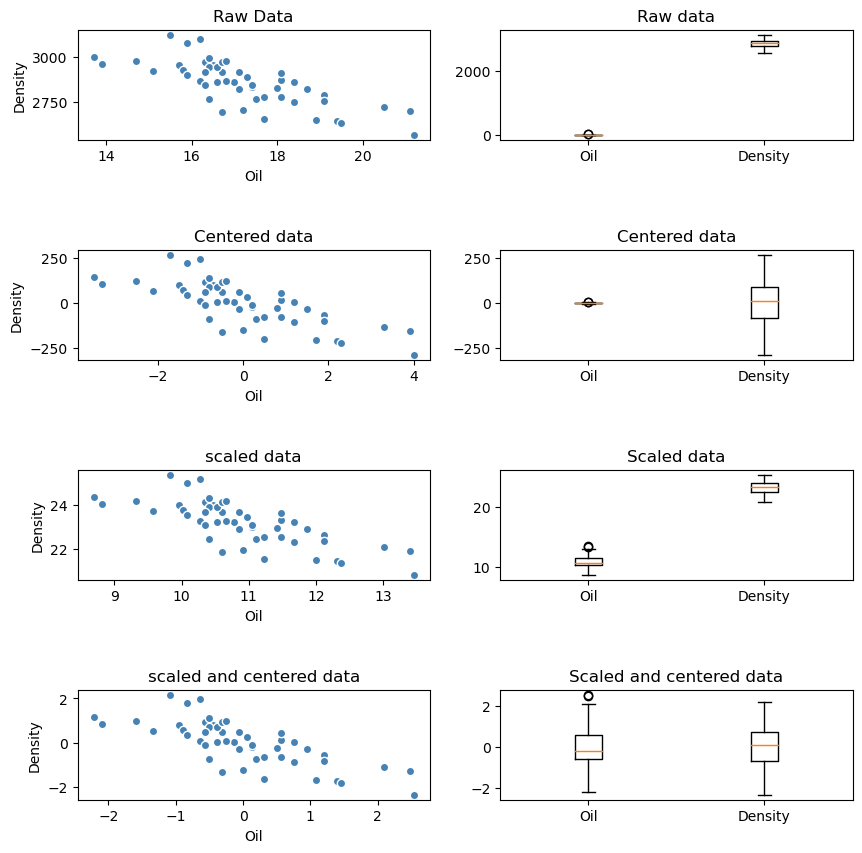

In [13]:

def scale(v):
    return v/np.std(v)

oil_scaled = scale(food['Oil'])
density_scaled = scale(food['Density'])

### scale and center the data:
oil_sc = center(oil_scaled)
density_sc = center(density_scaled)

fig = plt.figure(figsize=(10,10))

## subplot 1: not centered data
plt.subplot(4, 2, 1) 
plt.scatter(food['Oil'].values,food['Density'], c='steelblue', edgecolor = 'white')
plt.xlabel('Oil')
plt.ylabel('Density')
plt.title('Raw Data')

## subplot 2: not centered data
plt.subplot(4, 2, 2) 
plt.boxplot((food['Oil'], food['Density']), sym="o", labels=["Oil", "Density"])
plt.title('Raw data')

## subplot 3: centered data
plt.subplot(4, 2, 3) 
plt.scatter(oil_centered,density_centered, c='steelblue', edgecolor = 'white')
plt.xlabel('Oil')
plt.ylabel('Density')
plt.title('Centered data')

## subplot 4: centered data
plt.subplot(4, 2, 4) 
plt.boxplot((oil_centered,density_centered), sym="o", labels=["Oil", "Density"])
plt.title('Centered data')

## subplot 5: scaled data
plt.subplot(4, 2, 5)
plt.scatter(oil_scaled,density_scaled, c='steelblue', edgecolor = 'white')
plt.xlabel('Oil')
plt.ylabel('Density')
plt.title('scaled data')

## subplot 6: scaled data
plt.subplot(4, 2, 6) 
plt.boxplot((oil_scaled,density_scaled), sym="o", labels=["Oil", "Density"])
plt.title('Scaled data')



## subplot 7: scaled and centered data
plt.subplot(4, 2, 7) 
plt.scatter(oil_sc,density_sc, c='steelblue', edgecolor = 'white')
plt.xlabel('Oil')
plt.ylabel('Density')
plt.title('scaled and centered data')


## subplot 8: scaled and centered data
plt.subplot(4, 2, 8) 
plt.boxplot((oil_sc,density_sc), sym="o", labels=["Oil", "Density"])
plt.title('Scaled and centered data')
plt.subplots_adjust(hspace = 1)

### 5.1.2 Extract Principal components


Suppose we have $n$ measurements on a vector $\mathbf x$ of $d$ features, and we wish to reduce the dimension from $d$ to $k$, where $k$ is typically much smaller than $d$. PCA does this by finding linear combinations, $\phi_1 \mathbf x, \phi_2 \mathbf x, ..., \phi_k \mathbf x$, called **principal components**, that successively have maximum variance for the data, subject to being uncorrelated with previous $\phi_k \mathbf x$. Solving this maximization problem, we find that the vectors $\phi_1, \phi_2, ..., \phi_k$ are the [**eigenvectors**](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors){target="_blank"} of the data [**covariance matrix**](https://en.wikipedia.org/wiki/Covariance_matrix), corresponding to the $k$ largest [**eigenvalues**](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) (Lovric 2011).

The core principle in PCA is that the principal components are obtained from the eigenvectors of the covariance matrix (Hastie et al 2008). The **eigenvectors (principal components)** determine the directions of the new feature space, and the **eigenvalues** give the variances of their respective principal components. The ratio of the sum of the first $k$ eigenvalues to the sum of the variances of all $d$ original variables represents the proportion of the total variance in the original data set accounted for by the first $k$ principal components.


There are two very popular approaches to compute the principal components, one approach is referred to as the [spectral decomposition or (eigendecomposition)](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix), whereas the other approach is referred to as [singular value decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition). In this tutorial we focus on the  eigendecomposition approach as it is more intuitive, however please note that most PCA software implementations perform SVD to improve the computational efficiency. 

Let us compute the principal components of our scaled and centered data. First, let us start with some mathematical notations.

The **data covariance matrix** is defined by

$$S = \frac{1}{N}\sum_{n=1}^N(x_n-\bar x)(x_n-\bar x)^T\text{.}$$


**Eigenvectors** are a special type of vectors that fulfill the following equation 

$$\mathbf A \vec v = \lambda \vec v\text{,}$$
where $\mathbf A$ is a matrix, $\vec v$ is a non-negative vector, denoted as [eigenvector](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) $(\vec v \ne \vec 0)$ and $\lambda$ is a scalar $(\lambda \in \mathbb R)$, denoted as [eigenvalue](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors).

Just to make sure we understand the mechanics, we compute the principal components manually in Python. The data covariance matrix is computed by applying numpys function `np.cov()`, and for the computation of the eigenvalues we apply the `eigen()` function. Please note that the `eigen()` function returns both, the eigenvalues and the eigenvectors. In general, a $n \times d$ data matrix has $min(n − 1, d)$ distinct principal components. Thus, for our specific data set we expect  $min(n-1,d)=min(50,2) = 2`$ eigenvectors and accordingly 2 eigenvalues.

In [14]:
# Comoute the covariance matrix of the scaled and centered data:
oil_density_cov = np.cov(oil_sc,density_sc)

oil_density_cov

array([[ 1.02040816, -0.7653306 ],
       [-0.7653306 ,  1.02040816]])

Compute the eigenvectors using the function `scipy.linalg`.
* *eigval* is a 1D NumPy array of complex numbers giving the eigenvalues of the matrix oil_density_cov.
* eigvecs is a 2D NumPy array with the corresponding eigenvectors in the columns

In [26]:
import scipy.linalg as la

eigvals, eigvecs = la.eig(oil_density_cov)

print('Eigenvalues:', eigvals)
print('Eigen vectors: \n', eigvecs)

Eigenvalues: [1.78573877+0.j 0.25507756+0.j]
Eigen vectors: 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


Hence, we found the two eigenvectors (principal components) and two eigenvalues of the data covariance matrix. We denote them as $p_j$ and  and $\lambda_j$, respectively, where $j = 1,2,...,min(n-1,d)$. (*Note that the principal components are only unique up to a sign change.*)


$$
\begin{align}
\mathbf p_{1}=  
       \begin{bmatrix}
        0.70710678 \\  0.70710678
        \end{bmatrix}
\end{align}
\text{,}\qquad
\mathbf p_{2}= 
  \begin{bmatrix}
         - 0.70710678 \\  0.70710678
  \end{bmatrix}
  \text{,}\qquad
\mathbf \lambda_{1}= 
  \begin{bmatrix}
        1.78573877
  \end{bmatrix}
    \text{,}\qquad
\mathbf \lambda_{2}= 
  \begin{bmatrix}
   0.25507756
  \end{bmatrix}
$$



> **Exercise PCA-1:** <br>
use numpy (import numpy as np) and calculate the scalar products of the eigen vectors to test, if they are orthogonal.


In [24]:
## General example: 

import numpy as np

# define to vectors a and b:
a = np.array([1,2,3])
b = np.array([4,5,6])

# the scalar product is calculated as follows: 1*4+2*5+3*6 = 32
# use numpys function np.dot(.,.)
# see: https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot

np.dot(a,b)

### Further Hints: 
#
# type(eigvecs)
# np.shape(eigvecs)

# eigvecs[0]
# eigvecs[1]

32

In [35]:
## your answer to exercise PCA-1 here

### The number of explanatory components


In the previous section we calculated the eigenvectors of the data covariance matrix (principal components) and plotted them together with the observations in our data set. In this section we focus on the **eigenvalues** of the data covariance matrix. Recall that the eigenvalues corresponds to the [variance](https://en.wikipedia.org/wiki/Variance) of their respective principal components. In fact, the *eigenvector with the highest eigenvalue is the first principle component of the data set*. Consequently, once eigenvectors are found from the covariance matrix, the next step is to order them by eigenvalue, highest to lowest. This gives the principal components in order of significance.

In general, a $n \times d$ data matrix $\mathbf X$ has $min(n − 1, d)$ distinct principal components. If $n \ge d$ we may calculate $d$ eigenvectors and $d$ eigenvalues. We then pick, based on the magnitude of the eigenvalues, only the first $k$ eigenvectors. By neglecting some principal components we lose some information, but if the eigenvalues are small, we do not lose too much. The goal is to find the smallest number of principal components required to get a good representation of the original data. 

So far we worked with a two-dimensional toy data set. This setting is not very instructive for choosing the most relevant principal components, as there are just two choices. Keep all of them or skip one, thus $k=2$ or $k=1$. To further elaborate this subject we scale and center all fesatures of the food data set and call it *food texture* data set in this section.

In [36]:
oil_sc = center(scale(food['Oil']))
density_sc = center(scale(food['Density']))
crispy_sc = center(scale(food['Crispy']))
fracture_sc = center(scale(food['Fracture']))
hardness_sc = center(scale(food['Hardness']))

# New pandas data frame with centered and scaled data: 
d = {'Oil sc': oil_sc, 'Density sc': density_sc, 'Crispy sc': crispy_sc, 'Fracture sc': fracture_sc, 'hardness sc': hardness_sc}
food_texture = pd.DataFrame(data=d)

food_texture.head()

,Oil sc,Density sc,Crispy sc,Fracture sc,hardness sc
B110,-0.445430,0.790272,-0.864754,0.395481,-1.011854
B136,0.315989,-1.603262,1.410914,-2.191776,0.351131
B171,-0.635784,0.100610,0.273080,-0.713344,0.480939
B192,-0.318527,0.506293,-0.864754,1.873913,-1.076758
B225,-0.572333,0.952546,-0.295837,0.949893,0.480939


The *food texture* data set consists of 50 rows (observations) and 6 columns (features/variables). These features are:

* Oil: percentage oil in the pastry
* Density: the product's density (the higher the number, the more dense the product)
* Crispy: a crispiness measurement, on a scale from 7 to 15, with 15 being more crispy.
* Fracture: the angle, in degrees, through which the pasty can be slowly bent before it fractures.
* Hardness: a sharp point is used to measure the amount of force required before breakage occurs.


Recall, the eigenvalues give the variances of their respective principal components and the ratio of the sum of the first $k$ eigenvalues to the sum of the variances of all $d$ original variables represents the proportion of the total variance in the original data set accounted for by the first $k$ principal components.

Let us calculate the eigenvalue for the *food texture* data set and the proportion of the total variance for each particular eigenvalue.


In [37]:
food_texture.cov()

,Oil sc,Density sc,Crispy sc,Fracture sc,hardness sc
Oil sc,1.020408,-0.765331,0.605190,-0.544632,-0.098005
Density sc,-0.765331,1.020408,-0.684639,0.583809,0.110140
Crispy sc,0.605190,-0.684639,1.020408,-0.861189,0.419483
Fracture sc,-0.544632,0.583809,-0.861189,1.020408,-0.380978
hardness sc,-0.098005,0.110140,0.419483,-0.380978,1.020408


In [38]:
eigvals, eigvecs = la.eig(food_texture.cov())

print('complex eigen values: \n',eigvals)
print(' ')

# If the imaginary part of the complex eigen values is zero:
eigvals = eigvals.real
print('real eigen values: \n',eigvals)

complex eigen values: 
 [3.09307466+0.j 1.32214874+0.j 0.31637688+0.j 0.24685723+0.j
 0.12358331+0.j]
 
real eigen values: 
 [3.09307466 1.32214874 0.31637688 0.24685723 0.12358331]


To compute the **proportion of variance explained by each principal component**, we simply divide the variance explained by each principal component by the total variance explained by all principal components:

In [39]:
food_pca_ev = eigvals/np.sum(eigvals)
print(food_pca_ev)

[0.60624263 0.25914115 0.06200987 0.04838402 0.02422233]


We see that the first principal component explains 61 % of the variance in the data, the second principal component explains 26%, the third component 6%, the fourth component 5% and the fifth component 2% of the variance in the data.



**How many principal components are needed?**

Unfortunately, there is no well-accepted objective way to decide how many principal components are enough (James et al. 2013). In fact, the question depends on the specific area of application and the specific data set. However, there are three simple approaches, which may be of guidance for deciding the number of relevant principal components. 

These are 

1. the visual examination of a scree plot
2. the variance explained criteria or
3. the Kaiser rule.

***
#### 5.1.3.1 The visual examination of a scree plot

A widely applied approach is to decide on the number of principal components by examining a **scree plot**. By eyeballing the scree plot, and looking for a point at which the proportion of variance explained by each subsequent principal component drops off. This is often referred to as an *elbow* in the scree plot. 
Let us plot the proportion of explained variance by each particular principal component with their absolute values (left plot) and as cumulative sums (right plot).


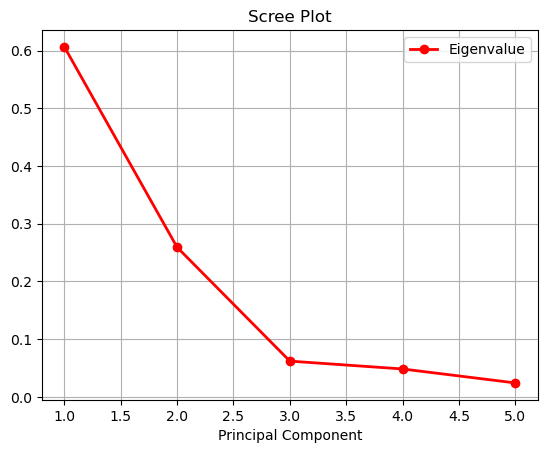

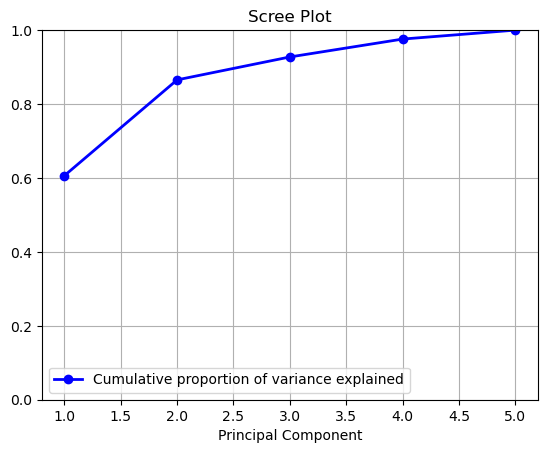

In [40]:
fig = plt.figure()

sing_vals = np.arange(1,6)

plt.plot(sing_vals, food_pca_ev, 'ro-', linewidth=2,label = 'Eigenvalue')
plt.title('Scree Plot')
plt.xlabel('Principal Component') 
plt.legend()
plt.grid()
plt.show()



plt.plot(sing_vals, np.cumsum(food_pca_ev),'bo-', linewidth=2,label = 'Cumulative proportion of variance explained') 
plt.legend()
plt.title('Scree Plot')
plt.xlabel('Principal Component') 
plt.ylim(0,1)
plt.grid()
plt.show()

By looking at the plots we see a more or less pronounced drop off (elbow in the scree plot) after the third principal component. Thus, **based on the scree plot we would decide to pick the first three principal components to represent our data set**, thereby explaining 93% of the variance in the data set.

Another simple approach to decide on the number of  principal components is **to set a threshold**, say 80%, and stop when the first $k$ components account for a percentage of total variation greater than this threshold (Jolliffe 2002). In our example the first two components account for 87% of the variation. Thus, based on the *variance explained criteria* we **pick the first two principal components to represent our data set**

In [41]:
np.cumsum(food_pca_ev)/np.sum(food_pca_ev)

array([0.60624263, 0.86538379, 0.92739365, 0.97577767, 1.        ])

Note that the threshold is set somehow arbitrary; 70 to 90% are the usual sort of values, but it depends on the context of the data set and can be higher or lower (Lovric 2011).

***
#### Kaiser's rule (Kaiser-Guttman criterion)

The Kaiser's rule (Kaiser-Guttman criterion) is a widely used method to evaluate the maximum number of linear combinations to extract from the data set. According to that rule only those principal components are retained, whose *variances exceed 1*. **The idea behind the Kaiser-Guttman criterion is that any principal with variance less than 1 contains less information than one of the original variables and so is not worth retaining (Jolliffe 2002)**.

Applying Kaiser's rule to the *food-texture* data set results in keeping the first two principal components.


In [14]:
eigvals[eigvals>=1]

array([3.09307466, 1.32214874])

### Deriving synthetic varibales


In the previous sections we discussed the computation of principal components and and how to pick a reasonable number of principal components to represent the data. In this section we will learn how to project the original data onto a new feature space with less dimensions. Recall that the principal components are the eigenvectors of the covariance matrix and that the eigenvalues correspond to the explained variance of the respective principal component.

In PCA the elements of the principal components are denoted as **loadings** ($\phi$). Written in vector form the loadings are referred to as **loading vector**, $\mathbf p_j$, where $j=1,2,...,k$. 

Let us take a look at the loading of the first two principal components, $p_1$ and $p_2$, of the *food-texture* data set.

In [42]:
d = {'PC 1': eigvecs[:,0], 'PC 2': eigvecs[:,1]}
pca = pd.DataFrame(data=d, index=['Oil', 'Density', 'Crispy', 'Fracture', 'Hardness'])

pca.head()

,PC 1,PC 2
Oil,-0.457533,0.370439
Density,0.478745,-0.356750
Crispy,-0.532388,-0.197661
Fracture,0.504477,0.221240
Hardness,-0.153403,-0.804666


The output from Python can be rewritten in vector form.


$$ 
\begin{align}
  \mathbf p_1=  
       \begin{bmatrix}
        \phi_{11}\\ \phi_{12}\\ \phi_{13}\\
        \phi_{14}\\\phi_{15}\\
        \end{bmatrix} = 
       \begin{bmatrix}
            -0.46 \\ 0.48 \\ -0.53 \\ 
            0.50 \\ -0.15
        \end{bmatrix}\text{,} \qquad
\mathbf p_2=
        \begin{bmatrix}
        \phi_{21}\\
        \phi_{22}\\
        \phi_{23}\\
        \phi_{24}\\
        \phi_{25}\\
        \end{bmatrix}  = 
       \begin{bmatrix}
            0.37 \\ -0.36 \\ -0.2 \\ 0.22 \\ -0.8 
        \end{bmatrix}
\end{align}
$$

Recall that the principal components are the eigenvectors of the data covariance matrix. By definition the length of an eigenvector is $1$. Hence, the squared sum of the loadings should sum up to $1$ $(\sum_{j=1}^{k}\phi_{j}^2=1)$. Let us check this claim.

In [43]:
print(np.sum(pca['PC 1']**2), np.sum(pca['PC 2']**2))

1.0 0.9999999999999999


The squared sum of loadings sums up to $1$ up to a small numerical error!


Recall that the principal components are linear combinations of $\phi \mathbf x$, where $\phi$ corresponds to the loading vector and $\mathbf x$ to one particular $d$-dimensional observation vector $(x_1, x_2,...,x_d)$ . By multiplying the i<sup>th</sup> observation vector, $\mathbf x_i$, and the j<sup>th</sup> loading vector $p_j$ we calculate the **score**, which **represents the projection** of the i<sup>th</sup> observation onto the j<sup>th</sup> principal components. 

We can explicitly write the score $(z_{ij})$ of the i<sup>th</sup> observations onto the first principal component $(j=1)$ as a linear combination of $\phi$ and $\mathbf x_i$

$$
z_{i1} = \phi_{11}x_{i1}+ \phi_{21}x_{i2},..., \phi_{d1}x_{id} \quad i = 1,2,..., n\text{,}
$$

and the score of the i<sup>th</sup> observations onto the second principal component $(j=2)$ as a linear combination of $\phi$ and $\mathbf x_i$

$$
z_{i2} = \phi_{12}x_{i1}+ \phi_{22}x_{i2},..., \phi_{d2}x_{id} \quad i = 1,2,..., n\text{,}
$$
and so forth.


Applied to the *food-texture*  data set the equation yields for the first principal component

$$
z_{i1} =  -0.46 x_{oil}+ 0.48 x_{density} - 0.53 x_{crispy} + 0.5 x_{fracture}-0.15 x_{hardness}
\quad i = 1,2,..., n\text{,}
$$

and for the second principal component

$$
z_{i2} = 0.37 x_{oil} -0.36 x_{density} -0.2 x_{crispy} + 0.22 x_{fracture}-0.8 x_{hardness}
\quad i = 1,2,..., n\text{.}
$$

Knowing these equations it becomes very easy to calculate the scores of the first observation in our data set $(i=1)$ for the first and the second principle components. 


In [44]:
z01 = pca.iloc[0,0]*food_texture.iloc[0,0]+ pca.iloc[1,0]*food_texture.iloc[1,0]+pca.iloc[2,0]*food_texture.iloc[2,0]+pca.iloc[3,0]*food_texture.iloc[3,0]+pca.iloc[4,0]*food_texture.iloc[4,0]

print(z01)

0.6206687787573446


These values, denoted as scores, correspond to the projection of the first data point in our data set onto the first and the second principal component, respectively. To calculate $n$ scores of $n$ observations for $k$ principal components we apply linear algebra and multiply the original variables with the principal component to compute the scores. These new values, our synthetic variables, are the projection of the original data onto a new feature space.

Let $\mathbf X_{n \times d}$ be the data matrix with $n$ observations, and $d$ features and let $\mathbf P_{d \times k}$, often referred to as **rotation matrix**, be a matrix with $k$ principal components in the columns, the matrix $\mathbf Z_{n \times k}$ holds the synthetic variables (scores) in $n$ rows and $k$ columns. 

$$
\mathbf Z_{n \times k} = \mathbf X_{n \times d} \mathbf P_{d \times k}
$$

In order to calculate the scores for our *food-texture* data set first check the shape of the matrices to calculate the matrix product in the second step:


In [45]:
print(food.shape,pca.shape,)

(50, 5) (5, 2)


In [46]:
import numpy as np

food_M = food_texture.to_numpy()
pca_M = pca.to_numpy()

## Calculate the matrix product of two matrices with np.dot
Z = np.dot(food_M, pca_M)
Z

array([[ 1.39725427,  0.62569463],
       [-2.82284799, -0.35731583],
       [-0.23996822, -0.87020421],
       [ 1.95902981,  1.15332817],
       [ 1.28080985, -0.67020043],
       [-2.01773569, -1.31153586],
       [-1.50329665,  0.63907552],
       [ 0.83727865,  2.40673743],
       [ 1.19718563, -0.35373623],
       [ 1.00354879, -0.3543876 ],
       [-0.99484294,  0.16138098],
       [-0.77543514, -1.20322788],
       [-2.21705531, -1.49942422],
       [ 0.85379081, -2.28296654],
       [ 2.2452386 ,  1.60425202],
       [-1.88748062, -1.95650453],
       [-2.06008746,  1.05626083],
       [-0.47664538, -0.64342825],
       [-1.58139044,  0.3134875 ],
       [-2.77201685, -0.28845672],
       [ 2.35958463, -2.08819632],
       [ 1.55802122, -0.9324849 ],
       [-1.75857566, -0.58100315],
       [ 1.12197406,  1.48450845],
       [-1.27824078, -0.74272096],
       [-0.99344525, -0.70264702],
       [ 1.5009033 ,  0.68157805],
       [ 1.14413854,  0.27086665],
       [-0.73218266,

Done! **We just projected our original 5-dimensional data set onto a new 2-dimensional feature space**. By plotting the 2-dimensional features we realize that the data was rotated and aligns along the dimensions of our first two principal components.


Text(0, 0.5, 'PC 2')

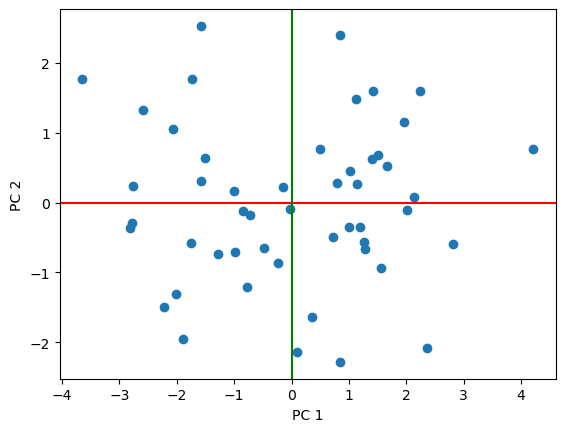

In [47]:
plt.scatter(Z[:,0],Z[:,1])
plt.axhline(y=0, color = 'red')
plt.axvline(x=0, color = 'green')
plt.xlabel('PC 1')
plt.ylabel('PC 2')


***
### 5.1.5 Biplots: Interprete and visualize PCA

#### 5.1.5.1 Interpreting score plots

Let us recall what a score value is: There is one score value for each observation (row) in the data set, so there are $n$ score values for the first component, another $n$ score values for the second component, and so on. The score value for an observation is the point where that observation projects onto the direction vector for say the first component. Or in vector terminology it is the distance from the origin, along the direction (loading vector) of the first component, up to the point where that observation projects onto the direction vector. 

An important point with PCA is that because the matrix $\mathbf P$ is orthonormal, any relationships that were present in $\mathbf X$ are still present in $\mathbf Z$. Thus score plots allow us to rapidly locate similar observations, clusters, outliers and time-based patterns (Dunn 2016).

The first two score vectors, $\mathbf Z_1$ and $\mathbf Z_2$, explain the greatest variation in the data, hence we usually start by looking at the $\{\mathbf Z_1, \mathbf Z_2\}$ scatter plot of the scores.


* Points close the average appear at the origin of the score plot. An observation that is at the mean value for all $k$-variables will have a score vector $Z_i = [0, 0,... , 0]$. 

* Scores further out are either outliers or naturally extreme observations.

* Original observations in $\mathbf X$ that are similar to each other will be similar in the score plot, while observations much further apart are dissimilar. It is much easier to detect this similarity in an $k$-dimensional space than the original $d$-dimensional space, when $d \gg k$.

***

#### 5.1.5.2 Interpreting loading plots

The loadings plot is a plot of the direction vectors that define the model. They show how the original variables contribute to creating the principal component.


Text(0, 0.5, 'PC 2')

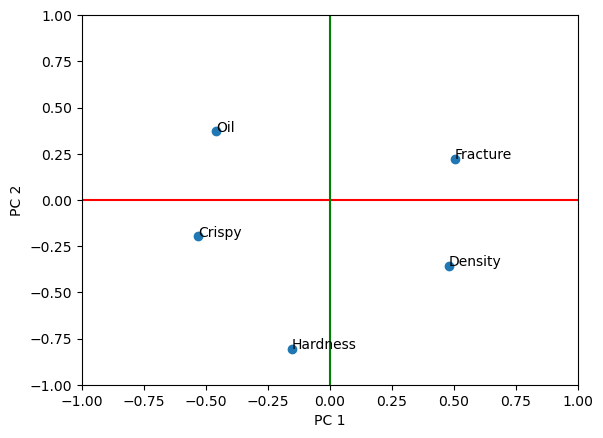

In [48]:
n = ['Oil', 'Density', 'Crispy', 'Fracture', 'Hardness']

fig, ax = plt.subplots()
ax.scatter(eigvecs[:,0], eigvecs[:,1])

for i, txt in enumerate(n):
    ax.annotate(txt, (eigvecs[i,0], eigvecs[i,1]))
    
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axhline(y=0, color = 'red')
plt.axvline(x=0, color = 'green')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

    

* Variables which have little contribution to a direction have almost zero weight in that loading.
* Variables which have roughly equal influence on defining a direction are correlated with each other and will have roughly equal numeric weights.
* Strongly correlated variables, will have approximately the same weight value when they are positively correlated. In a loadings plot of e.g. $p_1$ vs $p_2$ they will appear near each other, while negatively correlated variables will appear diagonally opposite each other.
* Signs of the loading variables are useful to compare within a direction vector; but these vectors can be rotated by 180° and still have the same interpretation.

Let us take a look at the scatterplotmatrix:

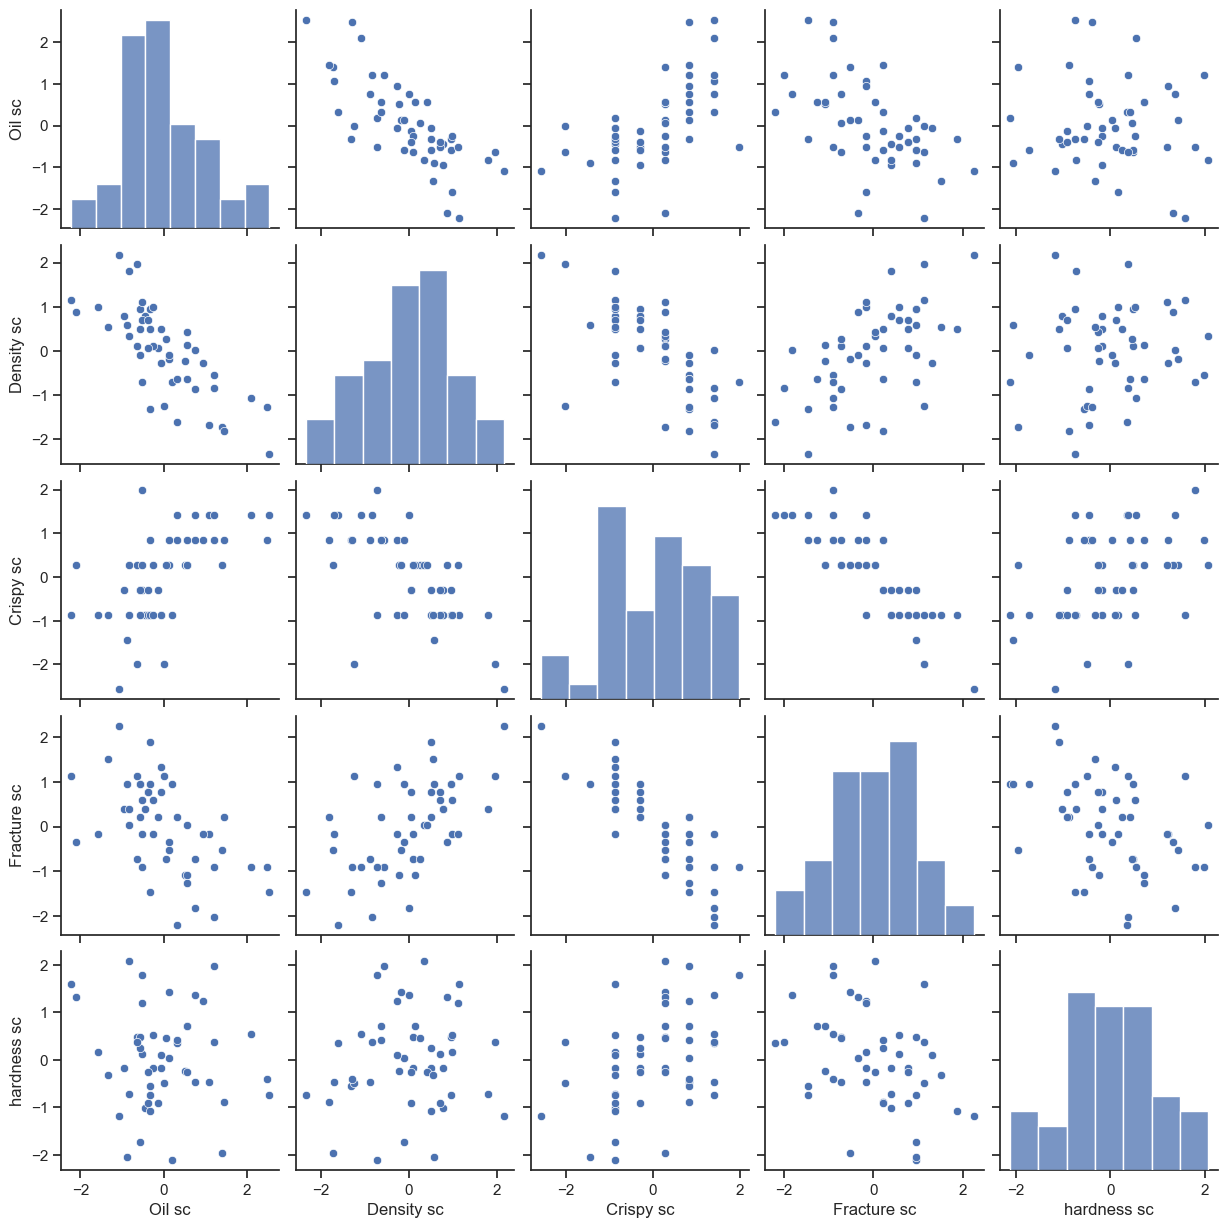

In [49]:
import seaborn as sns

sns.set(style="ticks")
sns.pairplot(food_texture)

***

####  Interpreting Biplots

The [biplot] (https://en.wikipedia.org/wiki/Biplot)is a very popular way for visualization of results from PCA, as it combines both the principal component scores and the loading vectors in a single biplot display. 



Text(0, 0.5, 'PC 2')

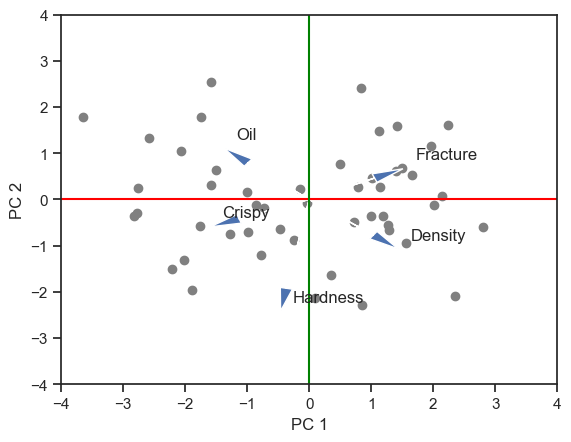

In [50]:
n = ['Oil', 'Density', 'Crispy', 'Fracture', 'Hardness']

fig, ax = plt.subplots()

plt.scatter(Z[:,0],Z[:,1],color='grey')

#ax.scatter(eigvecs[:,0], eigvecs[:,1])

for i, txt in enumerate(n):
    ax.annotate(txt, (eigvecs[i,0]*3+0.2, eigvecs[i,1]*3+0.2))
    plt.arrow(0,0,eigvecs[i,0]*3, eigvecs[i,1]*3,length_includes_head=True,
          head_width=0.2, head_length=.5) 
    
    
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.axhline(y=0, color = 'red')
plt.axvline(x=0, color = 'green')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

  

The plot shows the observations as points in the plane formed by two principal components (synthetic variables). Like for any scatterplot we may look for patterns, clusters, and outliers.

In addition to the observations the plot shows the original variables as vectors (arrows). They begin at the origin  $[0,0]$ and extend to coordinates given by the loading vector (see loading plot above). These vectors can be interpreted in three ways (Rossiter 2014):

* The *orientation* (direction) of the vector, with respect to the principal component space, in particular, its angle with the principal component axes: the more parallel to a principal component axis is a vector, the more it contributes only to that PC. 

* The *length in the space*; the longer the vector, the more variability of this variable is represented by the two displayed principal components; short vectors are thus better represented in other dimension.

* The *angles between vectors* of different variables show their correlation in this space: small angles represent high positive correlation, right angles represent lack of correlation, opposite angles represent high negative correlation.




***
## PCA in Python


In the previous sections we learned about PCA. We worked out an example from the scratch to emphasis the mechanics behind PCA. In general, however, we would rely on one of the implementations built-in in the Python sklearn package to conduct a PCA.
In this section we load the *wine* data set from the book *Python machine learning by S. Raschka & V. Mirjalili (2017)* and briefly showcase PCA by applying the Python machinery following this book by *S. Raschka & V. Mirjalili (2017)*. We will proceed in the following steps:


* we load the *wine* data set

* using `sklearn.model_selection` we split the data into 70% training and 30% test subsets.  

* we standardize the data with Pythons `sklearn.preprocessing`

* from `sklearn.decomposition` we `import PCA`, to do the PCA, i.e. to automatically calculate the covariance matrix and the eigenvalues and eigenvectors and calculate the total and explained variance. We do the PCA with the 70% data and then test the PCA with the remaining 30% of the data. 

See https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html




In [2]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()



,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


This data set is from the UCI machine learning repository. It consists of 178 wine samples with 13 features describing the different chemical properties. The class labels 1,2, 3 are 3 different types of grapes in the same region of Italy, but derived from different wine cultivars (See Raschka & Mirjalili, 2017).

We will use PCA to reduce the dimensions of the feature space from 13 features to 2 features. Further, this dimension reduction helps to fit a model for the class labels. 

In [3]:
# Splitting the data into 70% training and 30% test subsets.

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)


In [4]:
# Standardizing the data.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


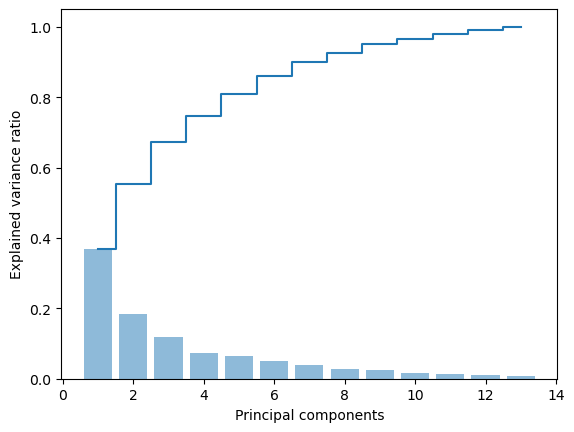

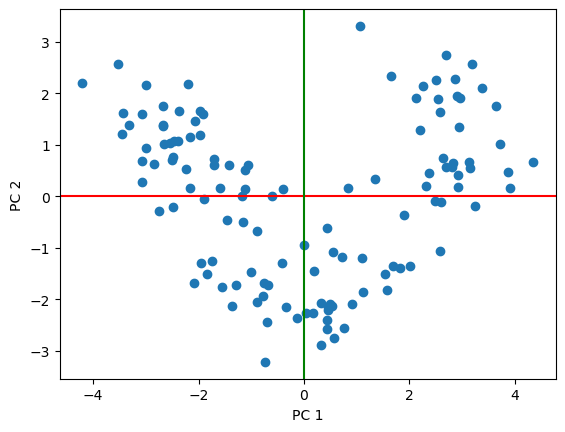

In [7]:
## Principal component analysis in scikit-learn

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()

# Fit the model with X and apply the dimensionality 
# reduction on X_train_std
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_


plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axhline(y=0, color = 'red')
plt.axvline(x=0, color = 'green')
plt.show()



We summarize that we have used PCA to reduce the dimensions, i.e. the number of variables/features, of our wine data set. Thus, PCA is used for dimension reduction of the data, i.e. for the preparation of our data before we fit a model. Next section, we will fit a logistic model based on the data from PCA.

>**Exercise PCA-2** <br>
> Visualize the results from the PCA of the wine data set with a biblot. Which variables are correlated? Use seaborns `pairplot` and compare your assumptions of the correlation with the outcome of the scatter plot matrix. 